In [1]:
# import other
%run other.ipynb

In [2]:
import numpy as np
import time
import math
from PIL import Image, ImageDraw

In [4]:
class filter_class:
    # Gaussian filter
    '''
    image 為 PIL.Image.Image
    n為陣列值3:3*3  5:5*5 7*7
    n為奇數，為mesh的大小
    '''
    def gaussian_filter(image_array_mesh, image, Variance_mode ='gaussian',n=3):
        import math
        image_array_mesh = image_array_mesh
        
        # Gaussian所需要的參數
        gauss_value = np.zeros(3)
        Variance_1 = np.zeros(3)
        Variance = np.zeros(3)
        average = np.zeros(3)
        num = n**2

        # 將大mesh逐一計算
        count_y = 0
        x_scale, y_scale = other_class.mesh_search(image_array_mesh, image)
        for x in range(x_scale):
            for y in range(y_scale):
                # Gaussian mesh
                mesh_temp = image_array_mesh[y, x]
                mesh = np.zeros((n,n,(3)), dtype='uint8')
                x_mesh, y_mesh, z = mesh_temp.shape #5 5 3

                count_x = 0
                count_y = 0
                #-----------------------------------計算Variance------------------------------------
                # 對一個大mesh做 卷積，逐一取出小 mesh
                for y2 in np.arange(0, y_mesh, 1):
                    for x2 in np.arange(0, x_mesh, 1):
                        if   (x2+n) < x_mesh and (y2+n) < y_mesh:
                            mesh = mesh_temp[x2:x2+n, y2:y2+n]
                            #print(1)
                        elif (x2+n) == x_mesh and (y2+n) < y_mesh:
                            mesh = mesh_temp[x_mesh-n:x_mesh, y2:y2+n]
                            #print(2)
                        elif (x2+n) < x_mesh and (y2+n) == y_mesh:
                            mesh = mesh_temp[x2:x2+n, y_mesh-n:y_mesh]
                            #print(3)
                        elif (x2+n) == x_mesh and (y2+n) == y_mesh:
                            mesh = mesh_temp[x_mesh-n:x_mesh, y_mesh-n:y_mesh]
                            #print(4)
                        else:
                            break
                            print("X")
                # 計算Variance
                if Variance_mode == 'gaussian': 
                    Variance_1 = np.zeros(3)
                    Variance = np.zeros(3)
                    for y2 in np.arange(0, n, 1):
                        for x2 in np.arange(0, n, 1):
                            for rgb in range(3):
                                average[rgb] = np.mean(mesh[:,:,(rgb)])
                                Variance_1[rgb] = (mesh[x2,y2,(rgb)]-average[rgb])**2
                                Variance[rgb] += Variance_1[rgb]
                    for rgb in range(3):
                        Variance[rgb] = Variance[rgb] / num
                        if Variance[rgb] ==0 or Variance[rgb] < 0.001:
                            Variance[rgb] = 0.01
                else:
                    Variance = np.array([Variance_mode, Variance_mode, Variance_mode])
                    
                #------------將各mesh的Variance逐一計算高斯權重並且乘上mesh內的RGB值，取代(0,0)的pixel----------------------------------
                for y2 in np.arange(0, y_mesh, 1):
                    for x2 in np.arange(0, x_mesh, 1):
                        if   (x2+n) < x_mesh and (y2+n) < y_mesh:
                            mesh = mesh_temp[x2:x2+n, y2:y2+n]
                            #print(1)
                        elif (x2+n) == x_mesh and (y2+n) < y_mesh:
                            mesh = mesh_temp[x_mesh-n:x_mesh, y2:y2+n]
                            #print(2)
                        elif (x2+n) < x_mesh and (y2+n) == y_mesh:
                            mesh = mesh_temp[x2:x2+n, y_mesh-n:y_mesh]
                            #print(3)
                        elif (x2+n) == x_mesh and (y2+n) == y_mesh:
                            mesh = mesh_temp[x_mesh-n:x_mesh, y_mesh-n:y_mesh]
                            #print(4)
                        else:
                            break
                            print("X")

                        gaussian_mesh = np.zeros((n,n,(3)), dtype='float')
                        count = 0
                        for cy in range(n):
                            for cx in range(n):
                                for y1 in np.arange(-cy, n-cy, 1):
                                    for x1 in np.arange(-cx, n-cx, 1):
                                        for rgb in range(3):
                                            #print(Variance[rgb])
                                            #print(x1)
                                            #print(y1)
                                            gaussian_mesh[x1, y1, (rgb)] = (1/(2*(math.pi)*Variance[rgb]))*(math.exp(-(x1**2+y1**2)/(2*Variance[rgb])))
                                            #print(gaussian_mesh[x1, y1, (rgb)])
                                #print(gaussian_mesh)
                                for rgb in range(3):
                                    sum_gaussian = np.sum(gaussian_mesh[:,:,(rgb)])
                                    if sum_gaussian < 0.000001:
                                        sum_gaussian = 0.01
                                    gaussian_mesh[:,:,(rgb)] = gaussian_mesh[:,:,(rgb)] / sum_gaussian
                                    #print(gaussian_mesh[:,:,(rgb)])
                                    mesh[cx, cy,(rgb)] = np.sum(mesh[:,:,(rgb)]*gaussian_mesh[:,:, (rgb)])
                                    #print(a[rgb])
        return image_array_mesh
    
    def gaussian_filter_nomash(image_array, Variance_mode ='gaussian',n=3):
        import math
        # Gaussian所需要的參數
        gauss_value = np.zeros(3)
        Variance_1 = np.zeros(3)
        Variance = np.zeros(3)
        average = np.zeros(3)
        num = n**2
        
        
        
        
        
    def Sharpening_filter_laplacian_3x3(image_array, c=1, level=32):
        '''
        這裡的卷積方法是沿著x方向
        這裡會使用邊緣擴增的方式來完成捲積
        c : 銳化遮罩的強度，數字越小，銳化強度越低
        '''
        n = 3 # kernel
        original_array = image_array
        # image.size   (233, 204)
        h, w, r = image_array.shape # (204, 233, 3)

        zero_array = np.zeros(1)
        image_array = np.insert(image_array, 0, zero_array, axis=0) #上
        image_array = np.insert(image_array, h, zero_array, axis=0) #下
        image_array = np.insert(image_array, 0, zero_array, axis=1) #左
        image_array = np.insert(image_array, w, zero_array, axis=1) #右

        h1, w1, r1 = image_array.shape

        # 銳化的mesh
        window = np.array((
            [-1, -1, -1],
            [-1, 8, -1],
            [-1, -1, -1]), dtype="int")

        sharpen_mesh_list = []
        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                if   (x+n > w1) or (y+n > h1):
                    continue
                else:
                    mesh = image_array[y:y+n, x:x+n]
                    #print(mesh.shape)
                    #print(y, x)
                for rgb in range(3):
                    pixel_value =  np.sum(mesh[rgb]*window)/level
                    if pixel_value<0:
                        pixel_value = 0
                    elif pixel_value > 255:
                        pixel_value = 255
                    else:
                        pass
                    sharpen_mesh_list.append(pixel_value)
        # 將list轉成array
        sharpen_mesh_array = np.array(sharpen_mesh_list, dtype='int')
        #對array做reshape
        sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])
        sharpen_mesh_array_reshape = original_array + c * sharpen_mesh_array_reshape
        for y in np.arange(0, h, 1):
            for x in np.arange(0, w, 1):
                for rgb in range(r):
                    pixel_value = sharpen_mesh_array_reshape[y,x,(rgb)]
                    if pixel_value < 0:
                        pixel_value = 0
                    elif pixel_value > 255:
                        pixel_value = 255
                    else:
                        pass
                    sharpen_mesh_array_reshape[y,x,(rgb)] = pixel_value
        sharpen_mesh_array_reshape = sharpen_mesh_array_reshape.astype('uint8')
        return sharpen_mesh_array_reshape
    
    '''
    # y方向的卷積
    def Sharpening_filter_laplacian_3x3(image_array):
        h, w, r = image_array.shape
        zero_array = np.zeros(n)
        image_array = np.insert(image_array, 0, zero_array, axis=0) #上
        image_array = np.insert(image_array, h, zero_array, axis=0) #下
        image_array = np.insert(image_array, 0, zero_array, axis=1) #左
        image_array = np.insert(image_array, w, zero_array, axis=1) #右
        
        h1, w1, r1 = image_array.shape
        
        # 銳化的mesh
        window = ([
            [-1, -1, -1],
            [-1,  8, -1],
            [-1, -1, -1]
        ])
        init = 0
        temp_b = np.zeros([h,1,(3)], dtype='uint8')
        sharpen_mesh_list = []
        for x in np.arange(0, w1-1, 1):
            if init == 1:

                a = np.array(sharpen_mesh_list , dtype='uint8')
                #print(a.shape)
                b = a.reshape([h,1,(3)])
                temp_b = np.concatenate((temp_b, b), axis = 1)
                sharpen_mesh_list = []
            for y in np.arange(0, h1, 1):
                if x==w1:
                    continue
                init = 1
                if   (x+n > w1) or (y+n > h1):
                    continue
                else:
                    mesh = image_array[y:y+n, x:x+n]
                    #print(mesh.shape)
                    #print(y, x)
                for rgb in range(3):
                    pixel_value =  np.sum(mesh[rgb]*window)/8
                    if pixel_value<0:
                        pixel_value = 0
                    elif pixel_value>255:
                        pixel_value = 255
                    else:
                        pass
                    sharpen_mesh_list.append(pixel_value)
        temp_b = np.delete(temp_b, 0, axis = 1)
        return temp_b
    '''
    
    def Sharpening_filter_laplacian_5x5(image_array, n=5):
        h, w, r = image_array.shape

        zero_array = np.zeros(1)
        image_array = np.insert(image_array, 0, zero_array, axis=0) #上
        image_array = np.insert(image_array, h, zero_array, axis=0) #下
        image_array = np.insert(image_array, 0, zero_array, axis=0) #上
        image_array = np.insert(image_array, h, zero_array, axis=0) #下

        image_array = np.insert(image_array, 0, zero_array, axis=1) #左
        image_array = np.insert(image_array, w, zero_array, axis=1) #右
        image_array = np.insert(image_array, 0, zero_array, axis=1) #左
        image_array = np.insert(image_array, w, zero_array, axis=1) #右
        h1, w1, r1 = image_array.shape
        # 銳化的mesh 5*5
        window = ([
            [-1, -1, -1, -1, -1],
            [-1,  2,  2,  2, -1],
            [-1,  2,  8,  2, -1],
            [-1,  2,  2,  2, -1],
            [-1, -1, -1, -1, -1]
        ])
        sharpen_mesh_list = []
        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                if   (x+n > w1) or (y+n > h1):
                    continue
                else:
                    mesh = image_array[y:y+n, x:x+n]
                    #print(mesh[:,:,(0)])
                    #print(y, x)
                for rgb in range(3):
                    pixel_value =  np.sum(mesh[:,:,(rgb)]*window)/8
                    if pixel_value < 0:
                        pixel_value = 0
                    elif pixel_value>255:
                        pixel_value = 255
                    else:
                        pass
                    sharpen_mesh_list.append(pixel_value)
        sharpen_mesh_array = np.array(sharpen_mesh_list, dtype='uint8')
        sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])
        return sharpen_mesh_array_reshape
    
    def median_filter(image_array, n = 3):
        '''
        中值濾波
        x方向卷積
        n最小為3 (限奇數)
        '''
        h, w, r = image_array.shape
        zero_array = np.zeros(1)
        padding = int(n//2)
        for i in range(padding):
            image_array = np.insert(image_array, 0, zero_array, axis=0) #上
            image_array = np.insert(image_array, h, zero_array, axis=0) #下
            image_array = np.insert(image_array, 0, zero_array, axis=1) #左
            image_array = np.insert(image_array, w, zero_array, axis=1) #右
        
        h1, w1, r1 = image_array.shape
        median_list = []
        median_value = 0
        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                if   (x+n > w1) or (y+n > h1):
                    continue
                else:
                    mesh = image_array[y:y+n, x:x+n]
                    #print(mesh.shape)
                    #print(y, x)
                for rgb in range(3):
                    median_value = np.median(mesh[:,:,(rgb)])
                    median_list.append(median_value)
                    
        sharpen_mesh_array = np.array(median_list, dtype='uint8')
        sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])
        return sharpen_mesh_array_reshape
    
    def average_filter(image_array, n = 3):
        '''
        中值濾波
        x方向卷積
        n最小為3 (限奇數)
        '''
        h, w, r= image_array.shape
        zero_array = np.zeros(1)
        padding = int(n//2)
        for i in range(padding):
            image_array = np.insert(image_array, 0, zero_array, axis=0) #上
            image_array = np.insert(image_array, h, zero_array, axis=0) #下
            image_array = np.insert(image_array, 0, zero_array, axis=1) #左
            image_array = np.insert(image_array, w, zero_array, axis=1) #右
        
        h1, w1, r1 = image_array.shape
        average_list = []
        average_value = 0
        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                if   (x+n > w1) or (y+n > h1):
                    continue
                else:
                    mesh = image_array[y:y+n, x:x+n]
                    #print(mesh.shape)
                    #print(y, x)
                for rgb in range(3):
                    average_value = np.mean(mesh[:,:,(rgb)])
                    average_list.append(average_value)
                    
        sharpen_mesh_array = np.array(average_list, dtype='uint8')
        sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])
        return sharpen_mesh_array_reshape
    
    def contrast_histogram_equalization_v(image_array):
        '''
        另一種寫法:
        import matplotlib.pyplot as plt
        import numpy as np
        import cv2


        img = cv2.imread('fff.jpg', 0)
        hist, bins = np.histogram(img.flatten(), 256, [0, 256])

        cdf = hist.cumsum()
        cdf_normalized = cdf * hist.max() / cdf.max()

        plt.plot(cdf_normalized, color='b')
        plt.hist(img.flatten(), 256, [0, 256], color = 'r')
        plt.xlim([0, 256])
        plt.legend(('cdf', 'histogram'), loc='upper left')
        plt.show()
        
        # calculate cdf
        cdf_m = np.ma.masked_equal(cdf, 0)
        cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
        cdf = np.ma.filled(cdf_m, 0).astype('uint8')

        # mapping
        img2 = cdf[img]
        res = np.hstack((img, img2))
        plt.figure(figsize=(10,10))
        plt.imshow(res, cmap="gray")
        
        #區間0~256 放入array中元素對應的個數
        hist, bins = np.histogram(img2.flatten(), bins= 256, range=[0, 256])

        cdf = hist.cumsum()
        cdf_normalized = cdf * hist.max() / cdf.max()

        plt.plot(cdf_normalized, color='b')
        plt.hist(img2.flatten(), 256, [0, 256], color = 'r')
        plt.xlim([0, 256])
        plt.ylim([0, 7000])
        plt.legend(('cdf', 'histogram'), loc='upper left')
        plt.show()
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        import copy
        h1, w1, r1 = image_array.shape
        v_list = [] # array中所有的 v值
        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                v_list.append(image_array[y,x,(2)])
        # 因為 v_list為小數，為了方便建立0計數、桶子排派序法，故先轉成array *255再轉回list。
        v_list_array = np.array(v_list)
        v_list_array = v_list_array*255
        v_list_0_256 = v_list_array.tolist()
        v_list_0_256 = np.array(v_list_0_256, dtype='int')
        v_list_0_256 = v_list_0_256.tolist()

        #桶子排序法
        v_count = [] #存放強度值從0~255由小到大的count。(包含0計數)
        # 可能有數量為0的強度值  pdf
        for i in range(256):
            v_count.append(0)
        for v_value in v_list_0_256:
            v_count[v_value] = v_count[v_value] + 1

        v_value = [] # 0~255強度值
        for i in range(256):
            v_value.append(i)

        #v_count_cdf = np.cumsum(v_count) 同下列程式碼
        v_count_cdf = []
        for i in range(256):
            temp = 0
            for j in range(i+1):
                temp = temp + v_count[j]
            v_count_cdf.append(temp)
        v_count_cdf = np.array(v_count_cdf)

        MN = h1 * w1
        '''
        v_count_cdf      : v_count的cdf ，最後一項等於MN(h*w)
        max(v_count)     : 0~256中數量最多的值
        v_count_cdf.max(): 等於MN(h*w)
        '''
        # 這裡等化的動作是為了將兩種圖合在一起，所以特別針對數量(y)做了等化
        v_count_cdf_normalized = v_count_cdf * max(v_count) / v_count_cdf.max() #等化後 藍線最大值為 強度值的最大count


        # calculate cdf
        # (v_count_cdf[i] - v_count[0]) / (MN - v_count[0]) 要減掉 v_count[0]，不然會出事。
        L = 256
        scale = (L-1)
        a=[]
        cdf_list = []
        for i in range(256):
            cdf = scale * (v_count_cdf[i] - v_count[0]) / (MN - v_count[0])
            cdf_list.append(round(cdf))

        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                a = int(image_array[y, x, (2)] * 255)
                index = v_value.index(a, 0, len(v_value))
                image_array[y, x, (2)] = cdf_list[index] /255
        return image_array
    
    def contrast_histogram_equalization_rgb(image_array):
        '''
        這邊有個問題
        這裡的HE方法並不能用在RGB圖片上，因為分別對R、G、B做了直方圖等化後，圖像會失真。
        所以，這個方法只能使用在R、G、B強度值相等的圖上。
        
        解決辦法 : 必須先將RGB轉成HSV，再對V做HE，再轉回RGB。
        '''
        import copy
        h1, w1, r1 = image_array.shape
        # 將array中的RGB分別存成list
        r_list = []
        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                r_list.append(image_array[y, x,(0)])

        g_list = []
        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                g_list.append(image_array[y, x,(1)])

        b_list = []
        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                b_list.append(image_array[y,x,(2)])

        # 桶子排序法，會依據list內的灰階值計數。
        L = 256
        r_bucket_grey_value = [] #將圖片出現過的 強度值 儲存起來
        g_bucket_grey_value = []
        b_bucket_grey_value = []
        r_bucket = [] #每個桶子存取相對應grey value的個數(count)。
        g_bucket = []
        b_bucket = []
        for i in range(L):
            r_bucket.append(0)
        # 將grey_value一個一個從list中讀取，並且丟到相對應的桶子
        for grey_value in r_list:
            if not(grey_value in r_bucket_grey_value):
                r_bucket_grey_value.append(grey_value)
            r_bucket[grey_value] = r_bucket[grey_value] + 1

        for i in range(L):
            g_bucket.append(0)
        # 將grey_value一個一個從list中讀取，並且丟到相對應的桶子
        for grey_value in g_list:
            if not(grey_value in g_bucket_grey_value):
                g_bucket_grey_value.append(grey_value)
            g_bucket[grey_value] = g_bucket[grey_value] + 1 

        for i in range(L):
            b_bucket.append(0)
        # 將grey_value一個一個從list中讀取，並且丟到相對應的桶子
        for grey_value in b_list:
            if not(grey_value in b_bucket_grey_value):
                b_bucket_grey_value.append(grey_value)
            b_bucket[grey_value] = b_bucket[grey_value] + 1

        #另外儲存bucket，這裡的bucket內有強度值為0，則拿掉。目的是為了r_bucket_grey_value和r_bucket的數量相符，可以畫直方圖。
        r_bucket_nonzero = copy.copy(r_bucket)
        g_bucket_nonzero = copy.copy(g_bucket)
        b_bucket_nonzero = copy.copy(b_bucket)
        for i in range(r_bucket_nonzero.count(0)):
            r_bucket_nonzero.remove(0)
        for i in range(g_bucket_nonzero.count(0)):
            g_bucket_nonzero.remove(0)
        for i in range(b_bucket_nonzero.count(0)):
            b_bucket_nonzero.remove(0)

        # 將r_bucket_grey_value依據大小排列。r_bucket_grey_value和r_bucket_nonzero的數量是一樣的
        # r_bucket_grey_value : 紀錄bucket出現過的強度值
        # r_bucket_nonzero    : 將計數不為0的強度值數量記錄起來。而r_bucket包含0，所以長度一定是256
        r_bucket_grey_value = sorted(r_bucket_grey_value)
        g_bucket_grey_value = sorted(g_bucket_grey_value)
        b_bucket_grey_value = sorted(b_bucket_grey_value)

        a = []
        for i in range(L):
            a.append(i)
        r_bucket_grey_value_0_256 = a
        g_bucket_grey_value_0_256 = a
        b_bucket_grey_value_0_256 = a
        '''
        # 將bugket內的資料丟回r_list並且grey_value從小排到大。
        index = 0
        for i in range(len(bucket)):
            if bucket[i] != 0:
                for j in range(bucket[i]):
                    r_list[index] = i
                    index += 1
        '''
        '''
        # 建立字典
        r_bucket_grey_value = []
        for i in range(max_unit8):
            r_bucket_grey_value.append(i)

        r_hist_dict = dict(zip(r_bucket_grey_value, r_bucket))
        '''
        '''
        # 列印直方圖(histogram)
        import matplotlib.pylab as plt
        plt.plot(r_bucket_grey_value, r_bucket)
        plt.show()
        '''
        # 直方圖等化 histogram equalization
        r_range = L-1
        MN = h1*w1
        p = 0
        s_r = [] # 更新 強度值
        s_g = []
        s_b = []
        r_r = [] # 紀錄 r 對應 s，方便之後將這些 s取代原本的 強度值
        r_g = []
        r_b = []
        for k in range(r_range + 1):
            p_temp = 0
            count = 0
            if (k in r_bucket_grey_value_0_256):
                for j in range(k):
                    p_temp = p_temp + r_bucket[j]
                p = r_range * p_temp
                r_r.append(k)
            s_r.append(round(p / MN)) # 更新的強度值要四捨五入

        for k in range(r_range + 1):
            p_temp = 0
            if (k in g_bucket_grey_value_0_256):
                for j in range(k):
                    p_temp = p_temp + g_bucket[j]
                p = r_range * p_temp
                r_g.append(k)
            s_g.append(round(p / MN)) # 更新的強度值要四捨五入

        for k in range(r_range + 1):
            p_temp = 0
            if (k in b_bucket_grey_value_0_256):
                for j in range(k):
                    p_temp = p_temp + b_bucket[j]
                p = r_range * p_temp
                r_b.append(k)
            s_b.append(round(p / MN)) # 更新的強度值要四捨五入

        s_r_dict_r = dict(zip(r_r, s_r)) #{原強度值, 新強度值}
        s_r_dict_g = dict(zip(r_g, s_g))
        s_r_dict_b = dict(zip(r_b, s_b))

        # 將原本的array內的 強度值 更新。
        update_image_array = np.zeros([h1, w1 ,(r1)], dtype='uint8')
        for y in np.arange(0, h1, 1):
            for x in np.arange(0, w1, 1):
                update_image_array[y, x, (0)] = s_r_dict_r.get(image_array[y, x,(0)])
                update_image_array[y, x, (1)] = s_r_dict_g.get(image_array[y, x,(1)])
                update_image_array[y, x, (2)] = s_r_dict_b.get(image_array[y, x,(2)])
        return update_image_array
    
    def binarization(image_array, threshold_low=50, threshold_high=205):
        h, w, r = image_array.shape

        for y in np.arange(0, h, 1):
            for x in np.arange(0, w, 1):
                for rgb in range(r):
                    if (image_array[y, x,(rgb)] <= threshold_low ):
                        image_array[y, x,(rgb)] = 0
                    elif (image_array[y, x,(rgb)] >= threshold_high ):
                        image_array[y, x,(rgb)] = 255
                    else:
                        pass
        return image_array

In [243]:
from PIL import Image, ImageDraw
import numpy as np
image = Image.open('fff.jpg')

In [244]:
# RGB TO HSV
image = image.convert('RGB')
image_array = np.array(image)
h1, w1, r1 = image_array.shape
image_array = image_array / 255   # R,G,B全部正規化到 0~1之間
s = 0
h = 0

for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        rgb_max = image_array[y, x].max()
        rgb_min = image_array[y, x].min()
        diff = rgb_max - rgb_min
        R = image_array[y, x, (0)]
        G = image_array[y, x, (1)]
        B = image_array[y, x, (2)]
        
        v = rgb_max
        if v != 0:
            s = (v - rgb_min)/v
        else:
            s = 0
        
        if diff == 0:
            h = 0
        elif v == R:
            h = (60*(G - B)) / (v - rgb_min)
        elif v == G:
            h = 120 + (60*(B - R)) / (v - rgb_min)
        elif v == B:
            h = 240 + (60*(R - G)) / (v - rgb_min)
        if h < 0:
            h = h+360
        else:
            h = h
        image_array[y, x] = np.array([h, s, v])

In [245]:
# contrast
'''
原histogram圖需要 (包含零計數)
    1. x:強度值 v_bucket_value
    2. y:強度值計數 v_bucket
新histogram圖需要 (包含零計數)
    1. s_r
    2. v_bucket
    
(h,s,v) -> (r,g,b)
v_bucket
'''
import copy
h1, w1, r1 = image_array.shape

# 將 image_array中的 v存成list
v_list = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        v_list.append(image_array[y,x,(2)])
# 對 V計數        
L = 1
v_bucket_value = [] #將圖片出現過的 強度值 儲存起來

v_bucket = []                                     # v的 count     (不包含0計數)
gray_value_counts = {}  # 空字典，由小到大。  強度值 : 強度值計數
for key in v_list:
    if not(key in v_bucket_value):
        v_bucket_value.append(key)
    gray_value_counts[key] = gray_value_counts.get(key, 0) + 1
v_bucket = list(gray_value_counts.values()) 
    
v_bucket_value = sorted(v_bucket_value) #v值 由小排到大 (不包含0計數)  
v_bucket_nonzero = copy.copy(v_bucket)            #v計數  (不包含0計數)
for i in range(v_bucket_nonzero.count(0)):
    v_bucket_nonzero.remove(0)
'''
這邊已經有了
len一樣
原v        : v_bucket_value  (由小到大 v值)
原v的count : v_bucket        (由小到大 v計數)

以下利用這些來計算新的v
'''
# 直方圖等化 histogram equalization
scale = 1 - 1/256    # (L-1)/L = 1-1/L
MN = h1*w1
cdf = 0
cdf_r = []
new_v = [] # 新 v
for k in range(len(v_bucket_value)):
    cdf_temp = 0
    for j in range(k):
        cdf_temp = cdf_temp + v_bucket[j]
    cdf_r.append(cdf_temp/MN)
    cdf = scale * cdf_temp
    new_v.append(cdf / MN)
# 將原本的array內的 強度值 更新。
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        index = v_bucket_value.index(image_array[y, x, (2)], 0, len(v_bucket_value))
        image_array[y, x, (2)] = new_v[index]

In [246]:
# HSV TO RGB
#image_array = np.array(image)
h1, w1, r1 = image_array.shape
m = 0
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        h = image_array[y, x, (0)]
        s = image_array[y, x, (1)]
        v = image_array[y, x, (2)]
        C = v * s
        h_temp = h/60
        X = C*(1-abs((h_temp % 2)-1))
        rgb_temp = np.zeros(3)
        if   (0 <= h_temp < 1):
            rgb_temp = np.array([C, X, 0])
        elif (1 <= h_temp < 2):
            rgb_temp = np.array([X, C, 0])
        elif (2 <= h_temp < 3):
            rgb_temp = np.array([0, C, X])
        elif (3 <= h_temp < 4):
            rgb_temp = np.array([0, X, C])
        elif (4 <= h_temp < 5):
            rgb_temp = np.array([X, 0, C])
        elif (5 <= h_temp < 6):
            rgb_temp = np.array([C, 0, X])
        else:
            rgb_temp = np.array([0, 0, 0])
        m = v - C
        m = np.array([m, m, m])
        image_array[y, x] = 255*(rgb_temp + m)
image_array = image_array.astype('uint8')

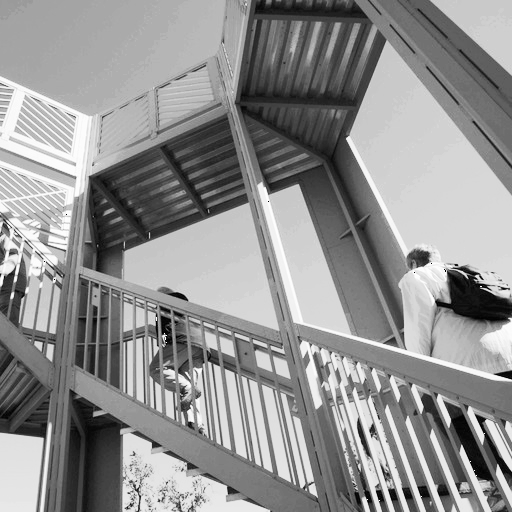

In [247]:
Image.fromarray(image_array.astype('uint8'), 'RGB')

In [157]:
image_array = np.array(image)
a = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        a.append(image_array[y, x, (0)])

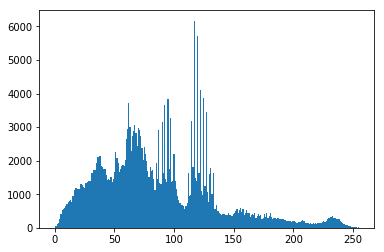

In [158]:
plt.hist(a, bins=256)
plt.show()

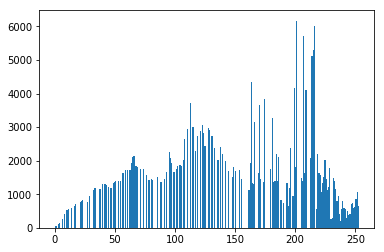

In [155]:
plt.hist(a, bins=256)
plt.show()

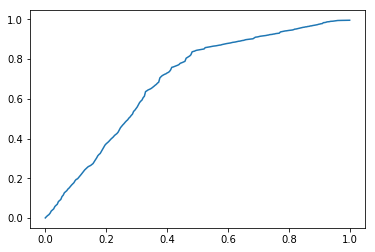

In [248]:
plt.plot(np.linspace(0,1,256), new_v)
plt.show()

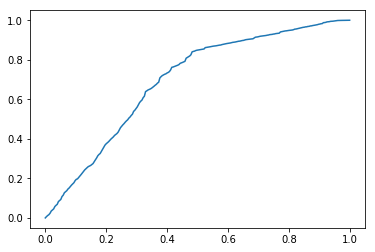

In [249]:
plt.plot(np.linspace(0,1,256), cdf_r)
plt.show()

In [5]:
from PIL import Image, ImageDraw
import numpy as np
image = Image.open('111.jpg')

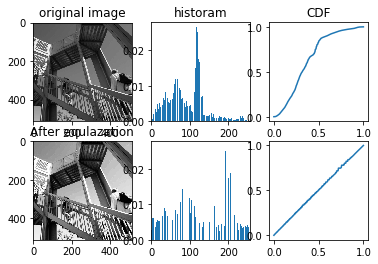

In [6]:
import numpy as np
from scipy import misc as mc
import matplotlib.pyplot as plt

def getHist(img):
    h = np.zeros(256)
    for i in img.flatten():
        h[i] = h[i] + 1
    return h

def normalization_histogram(h, t):
    for i in range(256):
        h[i] = h[i]/t
    return h

def getCDF(h):
    cdf = np.zeros(256)
    for i in range(256):
        cdf[i] = sum(h[0:i])
    return cdf


lena = mc.ascent()
# to get image height & witdh
x, y = lena.shape
# get total pixel
t = x*y

f, axarr = plt.subplots(2,3)
plt.gray()
axarr[0, 0].imshow(lena)
axarr[0, 0].set_title('original image')

hist = getHist(lena)
hist = normalization_histogram(hist, t)
axarr[0, 1].bar(range(256), hist)
axarr[0, 1].set_xlim([0,255])
axarr[0, 1].set_title('historam')

cdp = getCDF(hist)

axarr[0, 2].plot(np.linspace(0,1,256),cdp)
axarr[0, 2].set_title('CDF')

# histogram equalization
nlena = np.zeros([x,y], dtype=np.uint8)
for i in range(x):
    for j in range(y):
        t = cdp[lena[i,j]]*255
        nlena[i,j]=t

axarr[1, 0].imshow(nlena)
axarr[1, 0].set_title('After equlazation')

# re-calc new lena
x, y = nlena.shape
t = x*y
hist = getHist(nlena)
hist = normalization_histogram(hist, t)

axarr[1, 1].bar(range(256), hist)
axarr[1, 1].set_xlim([0,255])
cdf = getCDF(hist)
axarr[1, 2].plot(np.linspace(0,1,256),cdf)

plt.show()

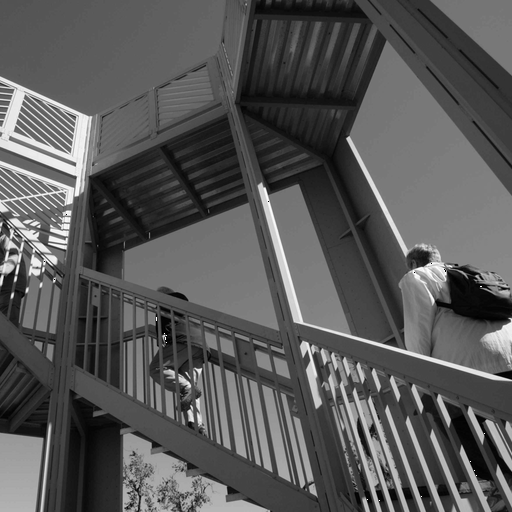

In [3]:
Image.fromarray(mc.ascent().astype('uint8'))

In [4]:
from PIL import Image, ImageDraw
import numpy as np
image = Image.open('111.jpg')

In [262]:
# RGB TO HSV
image = image.convert('RGB')
image_array = np.array(image)
h1, w1, r1 = image_array.shape
image_array = image_array / 255   # R,G,B全部正規化到 0~1之間
s = 0
h = 0

for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        rgb_max = image_array[y, x].max()
        rgb_min = image_array[y, x].min()
        diff = rgb_max - rgb_min
        R = image_array[y, x, (0)]
        G = image_array[y, x, (1)]
        B = image_array[y, x, (2)]
        
        v = rgb_max
        if v != 0:
            s = (v - rgb_min)/v
        else:
            s = 0
        
        if diff == 0:
            h = 0
        elif v == R:
            h = (60*(G - B)) / (v - rgb_min)
        elif v == G:
            h = 120 + (60*(B - R)) / (v - rgb_min)
        elif v == B:
            h = 240 + (60*(R - G)) / (v - rgb_min)
        if h < 0:
            h = h+360
        else:
            h = h
        image_array[y, x] = np.array([h, s, v])

In [263]:
# contrast
import copy
h1, w1, r1 = image_array.shape
v_list = [] # array中所有的 v值
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        v_list.append(image_array[y,x,(2)])
# 因為 v_list為小數，為了方便建立0計數、桶子排派序法，故先轉成array *255再轉回list。
v_list_array = np.array(v_list)
v_list_array = v_list_array*255
v_list_0_256 = v_list_array.tolist()
v_list_0_256 = np.array(v_list_0_256, dtype='int')
v_list_0_256 = v_list_0_256.tolist()

#桶子排序法
v_count = [] #存放強度值從0~255由小到大的count。(包含0計數)
# 可能有數量為0的強度值
for i in range(256):
    v_count.append(0)
for v_value in v_list_0_256:
    v_count[v_value] = v_count[v_value] + 1

v_value = [] # 0~255強度值
for i in range(256):
    v_value.append(i)

    
# 直方圖等化 histogram equalization
L = 256
scale = (L-1) / L    # (L-1)/L = 1-1/L
MN = h1*w1
cdf = 0 #累積pdf
new_v = [] # 新 v
for k in range(256):
    cdf_temp = 0
    for j in range(k+1):
        cdf_temp = cdf_temp + v_count[j]
    cdf = scale * cdf_temp
    new_v.append(cdf / MN)

# 將原本的array內的 強度值 更新。 
#v_value 對應 v_count --> v值 : v計數
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        a = int(image_array[y, x, (2)] * 255)
        index = v_value.index(a, 0, len(v_value))
        image_array[y, x, (2)] = float(new_v[index]/255)

In [213]:
# contrast
'''
原histogram圖需要 (包含零計數)
    1. x:強度值 v_bucket_value
    2. y:強度值計數 v_bucket
新histogram圖需要 (包含零計數)
    1. s_r
    2. v_bucket
    
(h,s,v) -> (r,g,b)
v_bucket
'''
import copy
h1, w1, r1 = image_array.shape

# 將 image_array中的 v存成list
v_list = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        v_list.append(image_array[y,x,(2)])
# 對 V計數        
L = 1
v_bucket_value = [] #將圖片出現過的 強度值 儲存起來

v_bucket = []                                     # v的 count     (不包含0計數)
gray_value_counts = {}  # 空字典，由小到大。  強度值 : 強度值計數
for key in v_list:
    if not(key in v_bucket_value):
        v_bucket_value.append(key)
    gray_value_counts[key] = gray_value_counts.get(key, 0) + 1
v_bucket = list(gray_value_counts.values()) 
    
v_bucket_value = sorted(v_bucket_value) #v值 由小排到大 (不包含0計數)  
v_bucket_nonzero = copy.copy(v_bucket)            #v計數  (不包含0計數)
for i in range(v_bucket_nonzero.count(0)):
    v_bucket_nonzero.remove(0)
'''
這邊已經有了
len一樣
原v        : v_bucket_value  (由小到大 v值)
原v的count : v_bucket        (由小到大 v計數)

以下利用這些來計算新的v
'''
# 直方圖等化 histogram equalization
scale = 1 - 1/256    # (L-1)/L = 1-1/L
MN = h1*w1
cdf = 0
new_v = [] # 新 v
for k in range(len(v_bucket_value)):
    cdf_temp = 0
    for j in range(k):
        cdf_temp = cdf_temp + v_bucket[j]
    cdf = scale * cdf_temp
    new_v.append(cdf / MN)
# 將原本的array內的 強度值 更新。
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        index = v_bucket_value.index(image_array[y, x, (2)], 0, len(v_bucket_value))
        image_array[y, x, (2)] = new_v[index]

In [264]:
# HSV TO RGB
#image_array = np.array(image)
h1, w1, r1 = image_array.shape
m = 0
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        h = image_array[y, x, (0)]
        s = image_array[y, x, (1)]
        v = image_array[y, x, (2)]
        C = v * s
        h_temp = h/60
        X = C*(1-abs((h_temp % 2)-1))
        rgb_temp = np.zeros(3)
        if   (0 <= h_temp < 1):
            rgb_temp = np.array([C, X, 0])
        elif (1 <= h_temp < 2):
            rgb_temp = np.array([X, C, 0])
        elif (2 <= h_temp < 3):
            rgb_temp = np.array([0, C, X])
        elif (3 <= h_temp < 4):
            rgb_temp = np.array([0, X, C])
        elif (4 <= h_temp < 5):
            rgb_temp = np.array([X, 0, C])
        elif (5 <= h_temp < 6):
            rgb_temp = np.array([C, 0, X])
        else:
            rgb_temp = np.array([0, 0, 0])
        m = v - C
        m = np.array([m, m, m])
        image_array[y, x] = 255*(rgb_temp + m)
image_array = image_array.astype('uint8')

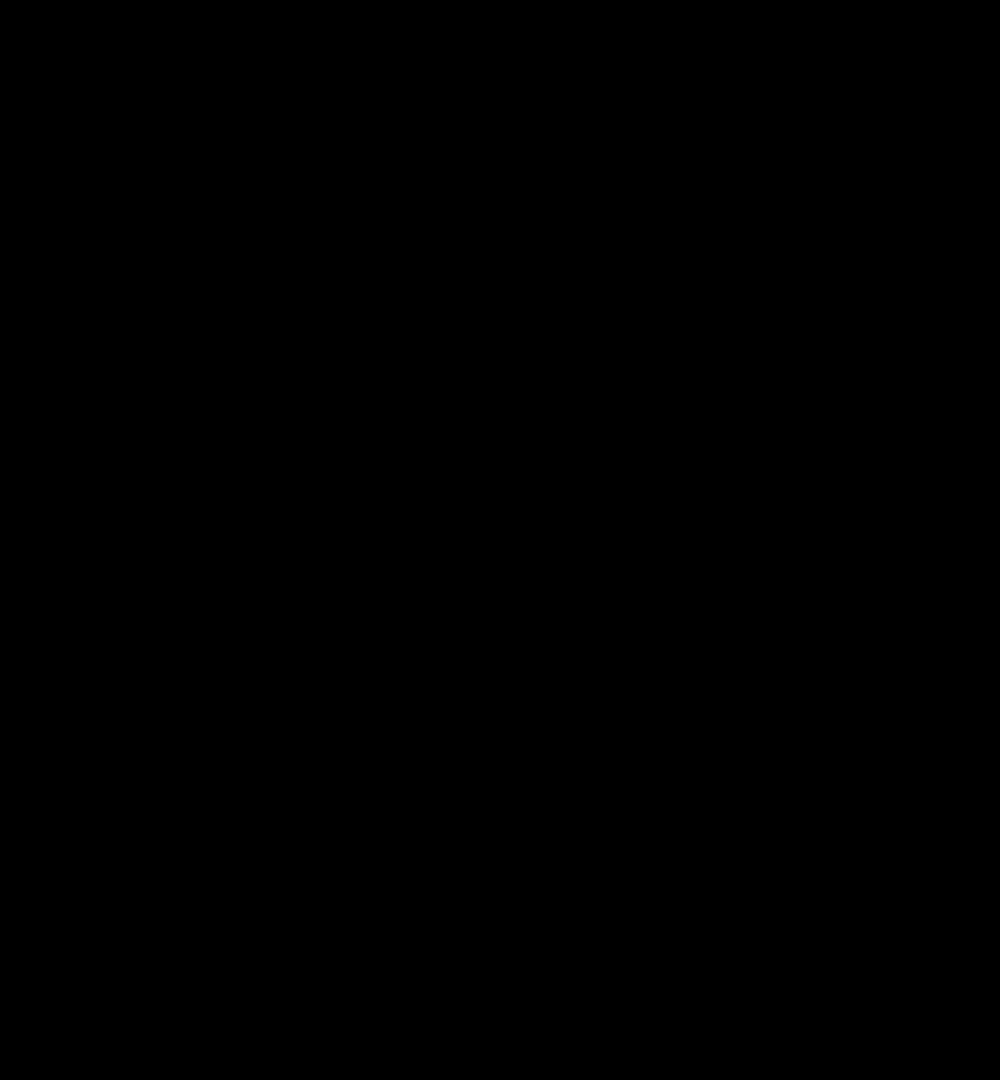

In [265]:
Image.fromarray(image_array.astype('uint8'), 'RGB')

In [227]:
image_array = np.array(image)
a = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        a.append(image_array[y, x, (1)])

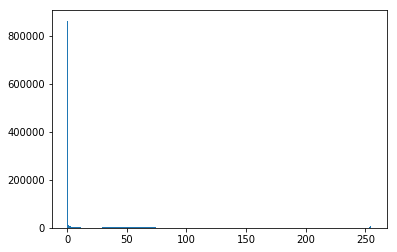

In [210]:
plt.hist(a, bins=256)
plt.show()

In [220]:
b = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        b.append(image_array[y, x, (1)])

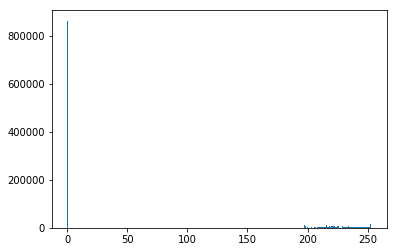

In [221]:
plt.hist(b, bins=256)
plt.show()

In [222]:
len(b)

1080000

In [224]:
len(v_bucket_value)

256

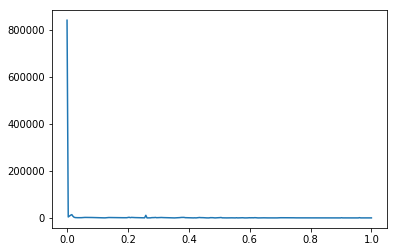

In [229]:
plt.plot(np.linspace(0,1,256),v_bucket)

In [82]:
from PIL import Image, ImageDraw
import numpy as np
image = Image.open('111.jpg')

In [83]:
# RGB TO HSV
#image = image.convert('RGB')
image_array = np.array(image)
h1, w1, r1 = image_array.shape
image_array = image_array / 255   # R,G,B全部正規化到 0~1之間
s = 0
h = 0

for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        rgb_max = image_array[y, x].max()
        rgb_min = image_array[y, x].min()
        diff = rgb_max - rgb_min
        R = image_array[y, x, (0)]
        G = image_array[y, x, (1)]
        B = image_array[y, x, (2)]
        
        v = rgb_max
        if v != 0:
            s = (v - rgb_min)/v
        else:
            s = 0
        
        if diff == 0:
            h = 0
        elif v == R:
            h = (60*(G - B)) / (v - rgb_min)
        elif v == G:
            h = 120 + (60*(B - R)) / (v - rgb_min)
        elif v == B:
            h = 240 + (60*(R - G)) / (v - rgb_min)
        if h < 0:
            h = h+360
        else:
            h = h
        image_array[y, x] = np.array([h, s, v])

In [84]:
# contrast
import matplotlib.pyplot as plt
import numpy as np
import copy
h1, w1, r1 = image_array.shape
v_list = [] # array中所有的 v值
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        v_list.append(image_array[y,x,(2)])
# 因為 v_list為小數，為了方便建立0計數、桶子排派序法，故先轉成array *255再轉回list。
v_list_array = np.array(v_list)
v_list_array = v_list_array*255
v_list_0_256 = v_list_array.tolist()
v_list_0_256 = np.array(v_list_0_256, dtype='int')
v_list_0_256 = v_list_0_256.tolist()

#桶子排序法
v_count = [] #存放強度值從0~255由小到大的count。(包含0計數)
# 可能有數量為0的強度值  pdf
for i in range(256):
    v_count.append(0)
for v_value in v_list_0_256:
    v_count[v_value] = v_count[v_value] + 1

v_value = [] # 0~255強度值
for i in range(256):
    v_value.append(i)

In [85]:
#v_count_cdf = np.cumsum(v_count) 同下列程式碼
v_count_cdf = []
for i in range(256):
    temp = 0
    for j in range(i+1):
        temp = temp + v_count[j]
    v_count_cdf.append(temp)
v_count_cdf = np.array(v_count_cdf)

In [86]:
MN = h1 * w1
'''
v_count_cdf      : v_count的cdf ，最後一項等於MN(h*w)
max(v_count)     : 0~256中數量最多的值
v_count_cdf.max(): 等於MN(h*w)
'''
# 這裡等化的動作是為了將兩種圖合在一起，所以特別針對數量(y)做了等化
v_count_cdf_normalized = v_count_cdf * max(v_count) / v_count_cdf.max() #等化後 藍線最大值為 強度值的最大count

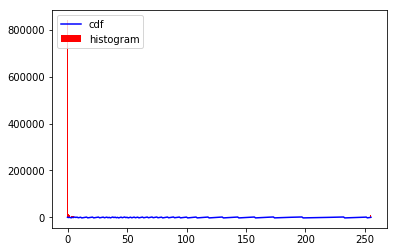

In [87]:
plt.plot(v_count_cdf_normalized, color='b')       #cdf 藍
plt.bar(np.arange(0,256,1), v_count, color = 'r') #pdf 紅
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

In [77]:
# calculate cdf
L = 256
scale = (L-1)
a=[]
cdf_list = []
for i in range(256):
    cdf = scale * (v_count_cdf[i] - v_count[0]) / (MN - v_count[0])
    cdf_list.append(cdf)

In [88]:
# calculate cdf
L = 256
scale = (L-1)
a=[]
cdf_list = []
for i in range(256):
    cdf = scale * (v_count_cdf[i] - v_count[0]) / (MN - v_count[0])
    cdf_list.append(round(cdf))

In [78]:
cdf_list = np.array(cdf_list, dtype='uint8')
cdf_list = cdf_list.tolist()

In [89]:
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        a = int(image_array[y, x, (2)] * 255)
        index = v_value.index(a, 0, len(v_value))
        image_array[y, x, (2)] = cdf_list[index] /255

In [90]:
# HSV TO RGB
#image_array = np.array(image)
h1, w1, r1 = image_array.shape
m = 0
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        h = image_array[y, x, (0)]
        s = image_array[y, x, (1)]
        v = image_array[y, x, (2)]
        C = v * s
        h_temp = h/60
        X = C*(1-abs((h_temp % 2)-1))
        rgb_temp = np.zeros(3)
        if   (0 <= h_temp < 1):
            rgb_temp = np.array([C, X, 0])
        elif (1 <= h_temp < 2):
            rgb_temp = np.array([X, C, 0])
        elif (2 <= h_temp < 3):
            rgb_temp = np.array([0, C, X])
        elif (3 <= h_temp < 4):
            rgb_temp = np.array([0, X, C])
        elif (4 <= h_temp < 5):
            rgb_temp = np.array([X, 0, C])
        elif (5 <= h_temp < 6):
            rgb_temp = np.array([C, 0, X])
        else:
            rgb_temp = np.array([0, 0, 0])
        m = v - C
        m = np.array([m, m, m])
        image_array[y, x] = 255*(rgb_temp + m)
image_array = image_array.astype('uint8')

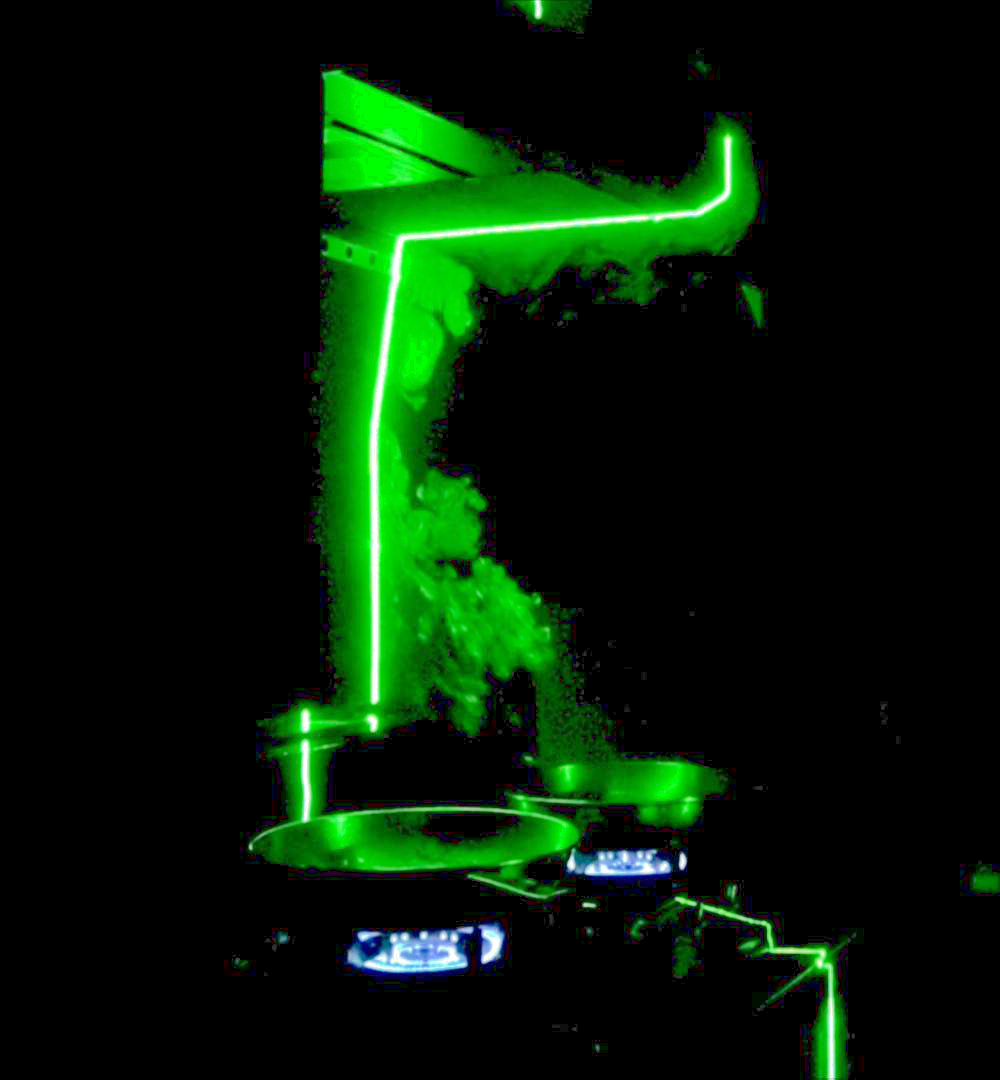

In [91]:
Image.fromarray(image_array, 'RGB')